# UNEMPLOYMENT IN INDIAA

# problem 

Unemployment is measured by the unemployment rate which is the 
number of people who are unemployed as a percentage of the total labour 
force. 
• We have seen a sharp increase in the unemployment rate during Covid-19,
• so analyzing the unemployment rate can be a good data science project.

# Import Libraries

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset 

In [63]:
df = pd.read_csv('Unemployment in India.csv')


In [64]:
#first five rows
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [65]:
#first five rows
print(df.tail())

    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN  


In [66]:
df.shape

(768, 7)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [68]:
print(df.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

In [69]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [70]:
df.dropna(inplace= True)

In [71]:
df.shape

(740, 7)

In [72]:
print(df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [73]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [74]:
df.columns = df.columns.str.strip() 


In [75]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [76]:
print(f"Data covers the period from {df['Date'].min()} to {df['Date'].max()}")

Data covers the period from 2019-05-31 00:00:00 to 2020-06-30 00:00:00


#  Univariate Analysis

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


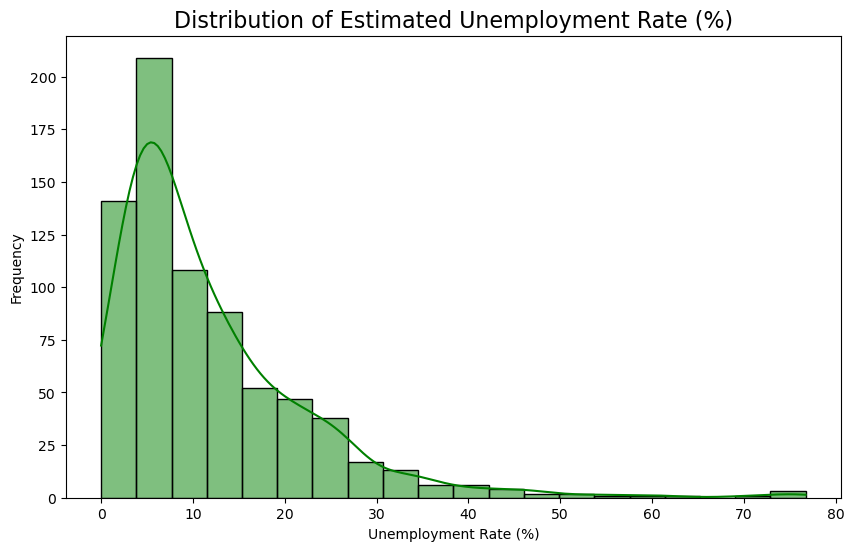

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True , color = 'green')
plt.title('Distribution of Estimated Unemployment Rate (%)', fontsize=16)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()



D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


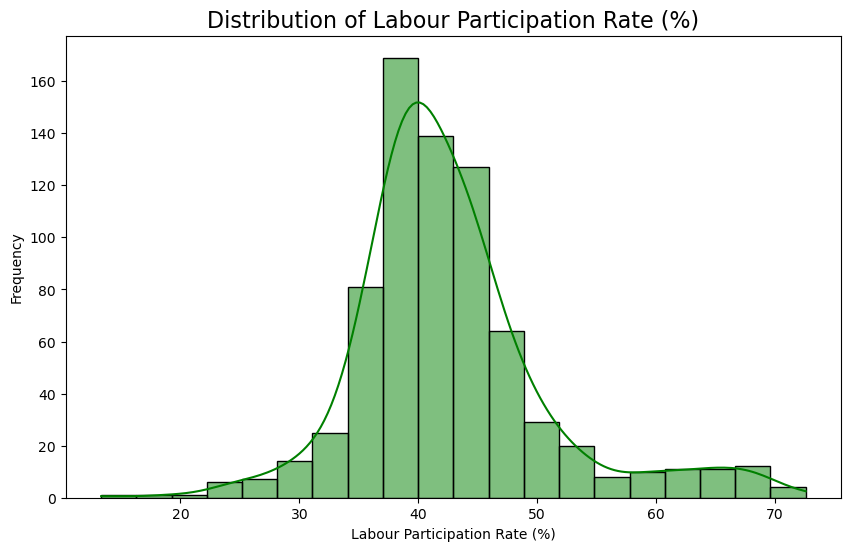

In [79]:
 # Distribution of Labor Participation Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Labour Participation Rate (%)'], bins=20, kde=True, color='green')
plt.title('Distribution of Labour Participation Rate (%)', fontsize=16)
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()


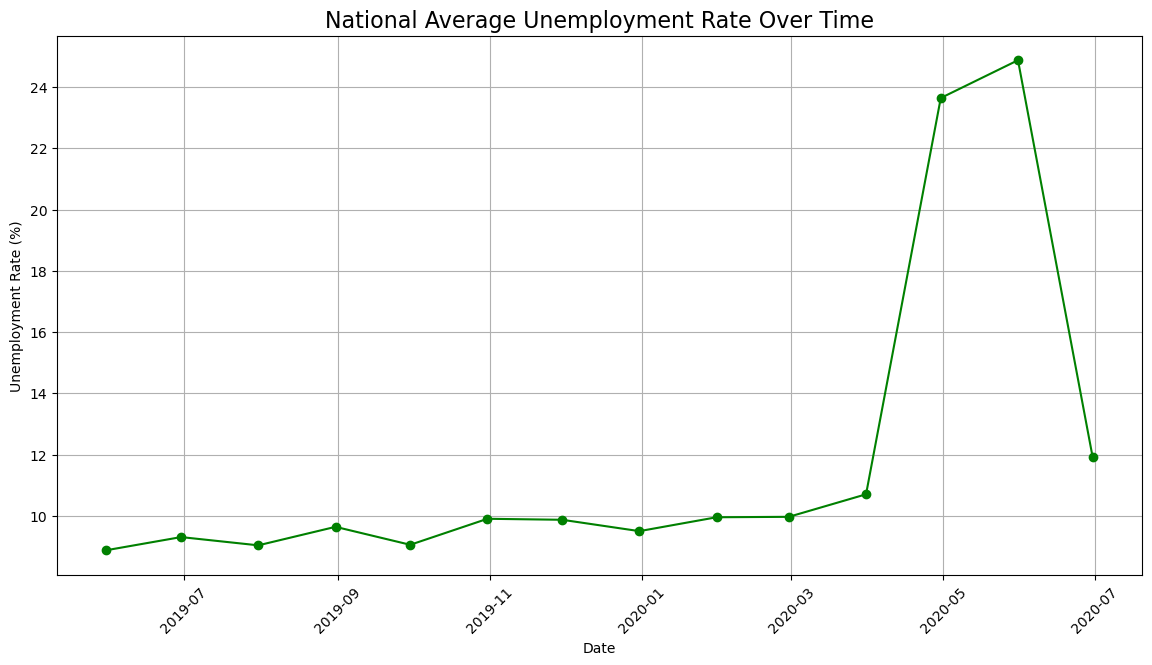

In [81]:
# Unemployment Rate Across Time (National Average)
plt.figure(figsize=(14, 7))
national_avg = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(national_avg, marker='o', linestyle='-' , color = 'green')
plt.title('National Average Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Bivariate Analysis

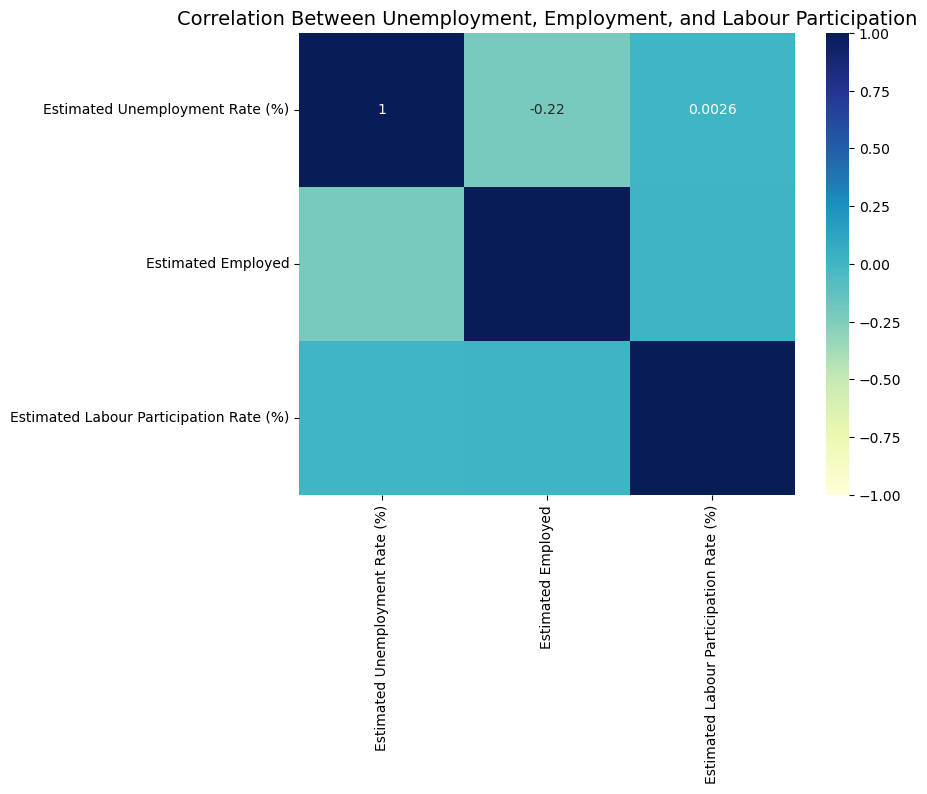

In [94]:
# Correlation Matrix
# Calculate correlation matrix
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Between Unemployment, Employment, and Labour Participation', fontsize=14)
plt.show()


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


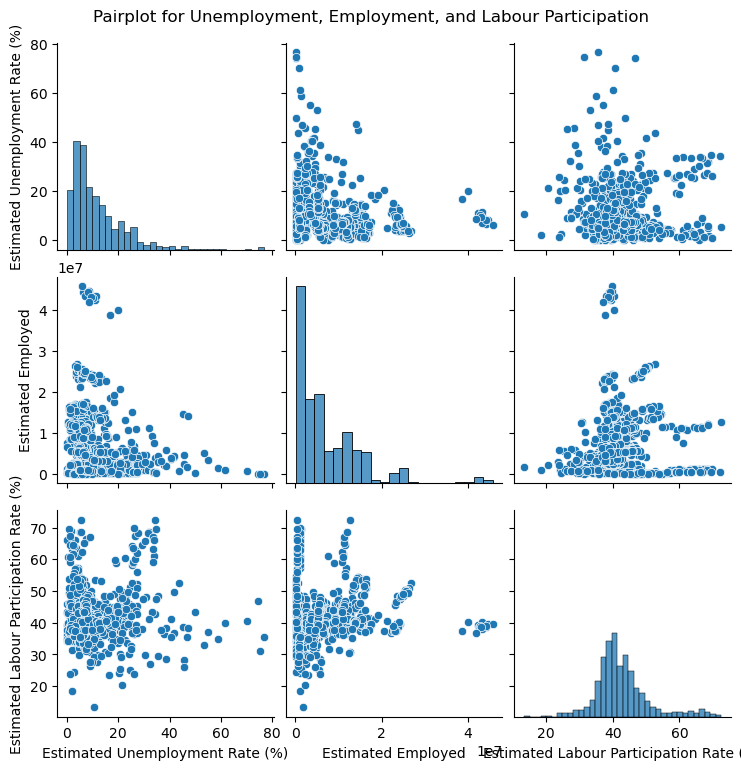

In [88]:
# Pairplot to Visualize Relationships
# Pairplot to visualize relationships between Unemployment, Employment, and Labour Participation
sns.pairplot(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.suptitle('Pairplot for Unemployment, Employment, and Labour Participation', y=1.02)
plt.show()



# Time-Series Analysis

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


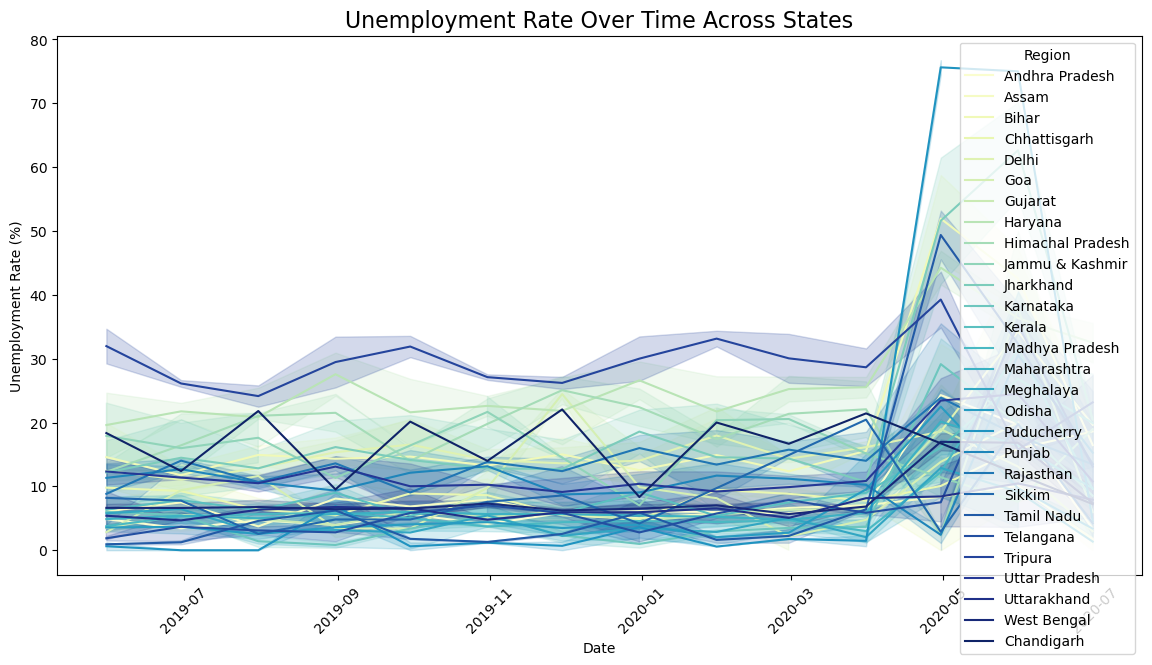

In [100]:
 # Unemployment Rate Over Time

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, hue='Region' , palette='YlGnBu')
plt.title('Unemployment Rate Over Time Across States', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


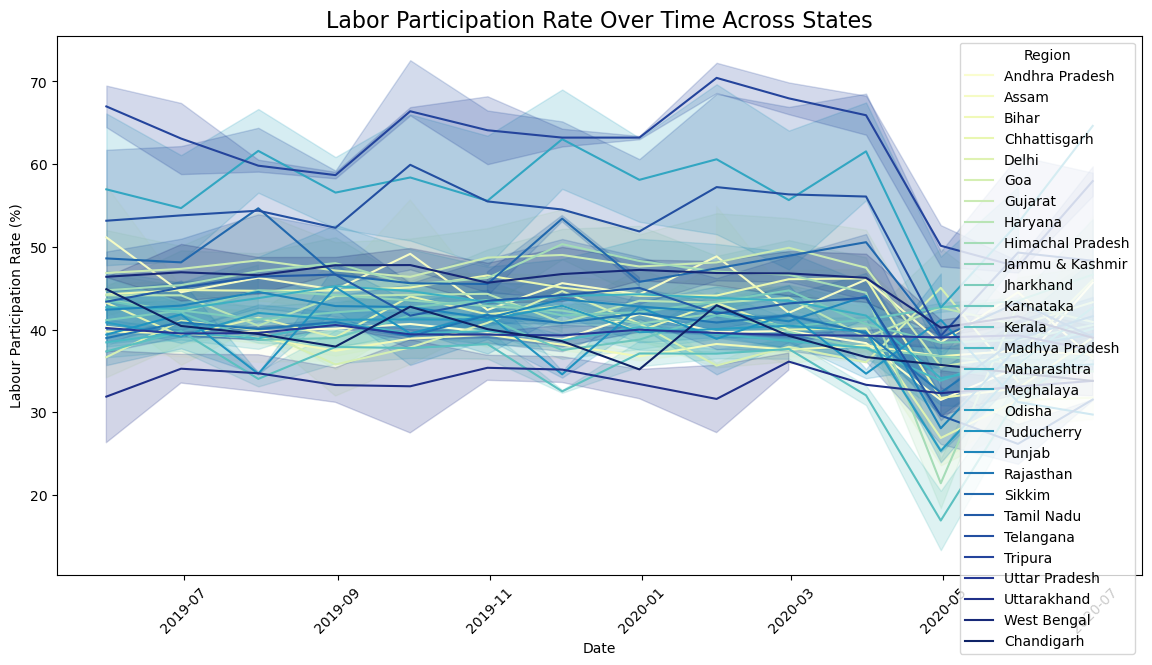

In [99]:
 # Labor Participation Rate Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Estimated Labour Participation Rate (%)', data=df, hue='Region', palette='YlGnBu')
plt.title('Labor Participation Rate Over Time Across States', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.show()


#  Outlier 

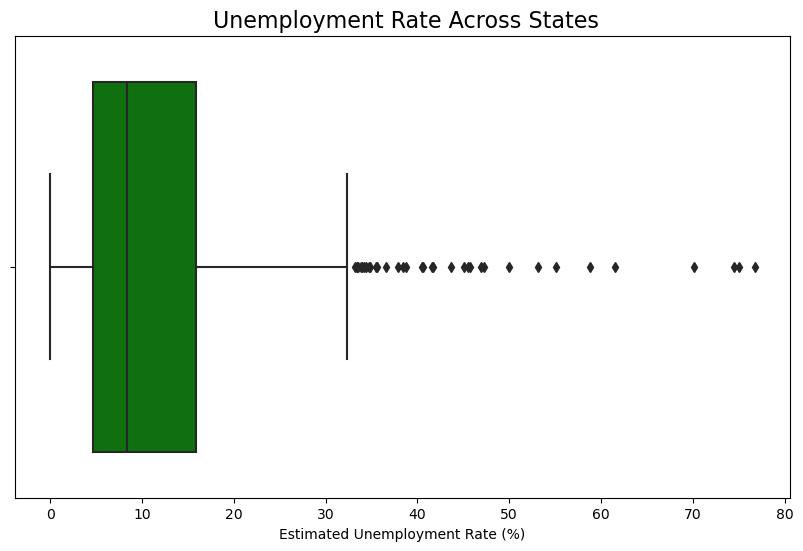

In [89]:
# Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estimated Unemployment Rate (%)', data=df , color = 'GREEN')
plt.title(' Unemployment Rate Across States', fontsize=16)
plt.show()

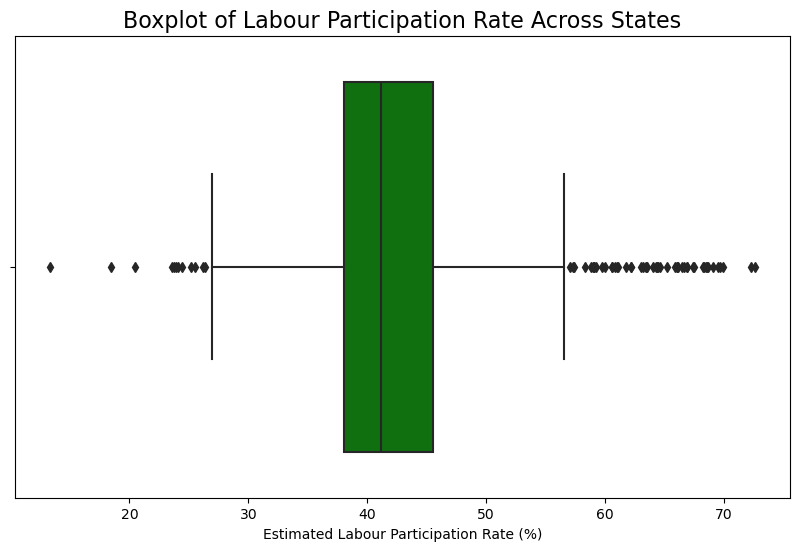

In [90]:
# Labor Participation Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estimated Labour Participation Rate (%)', data=df ,color = 'GREEN')
plt.title('Boxplot of Labour Participation Rate Across States', fontsize=16)
plt.show()


# Regional Analysis

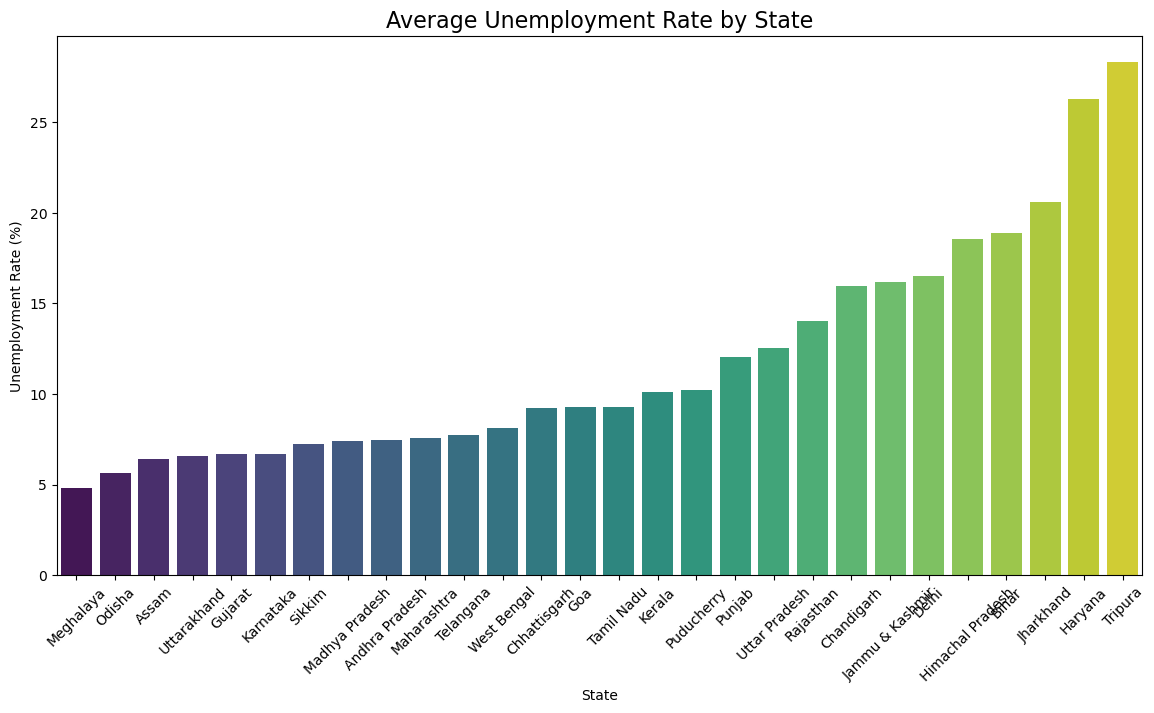

In [40]:
# Average Unemployment Rate by State
# Calculate the average unemployment rate by region
avg_unemployment_by_state = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Bar plot for average unemployment rate by state
plt.figure(figsize=(14, 7))
sns.barplot(x=avg_unemployment_by_state.index, y=avg_unemployment_by_state.values, palette='viridis')
plt.title('Average Unemployment Rate by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

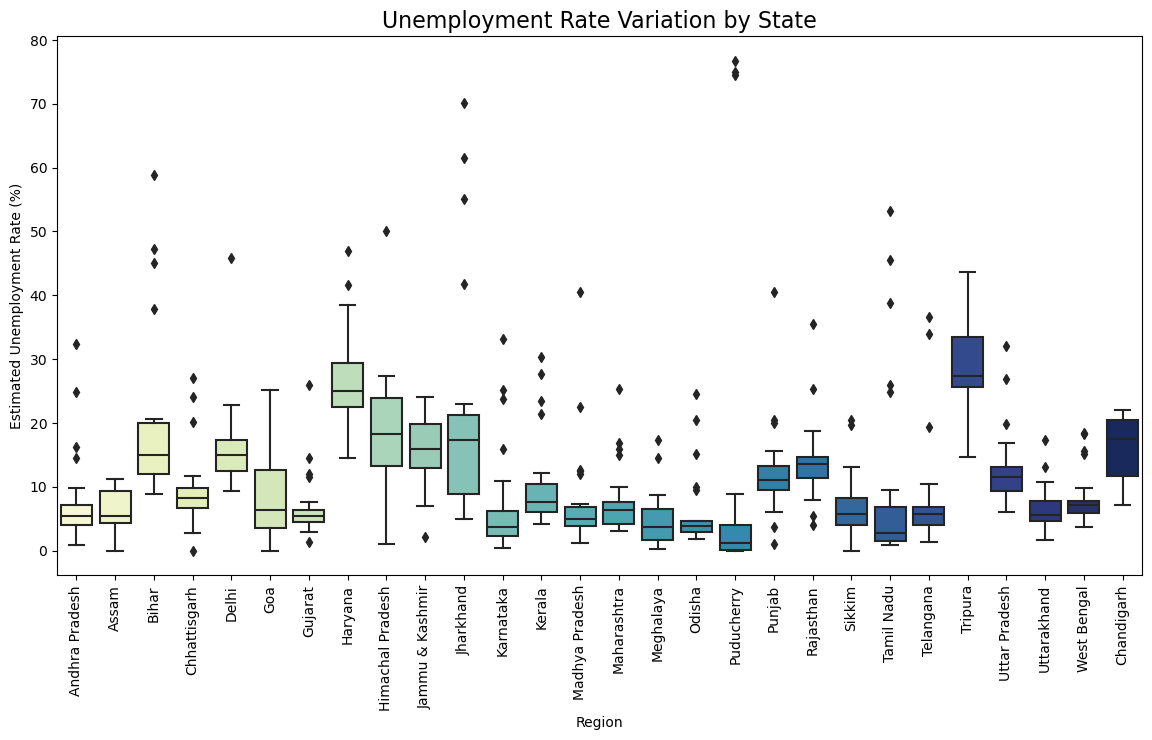

In [101]:
 # Regional Variation
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df , palette='YlGnBu')
plt.title('Unemployment Rate Variation by State', fontsize=16)
plt.xticks(rotation=90)
plt.show()


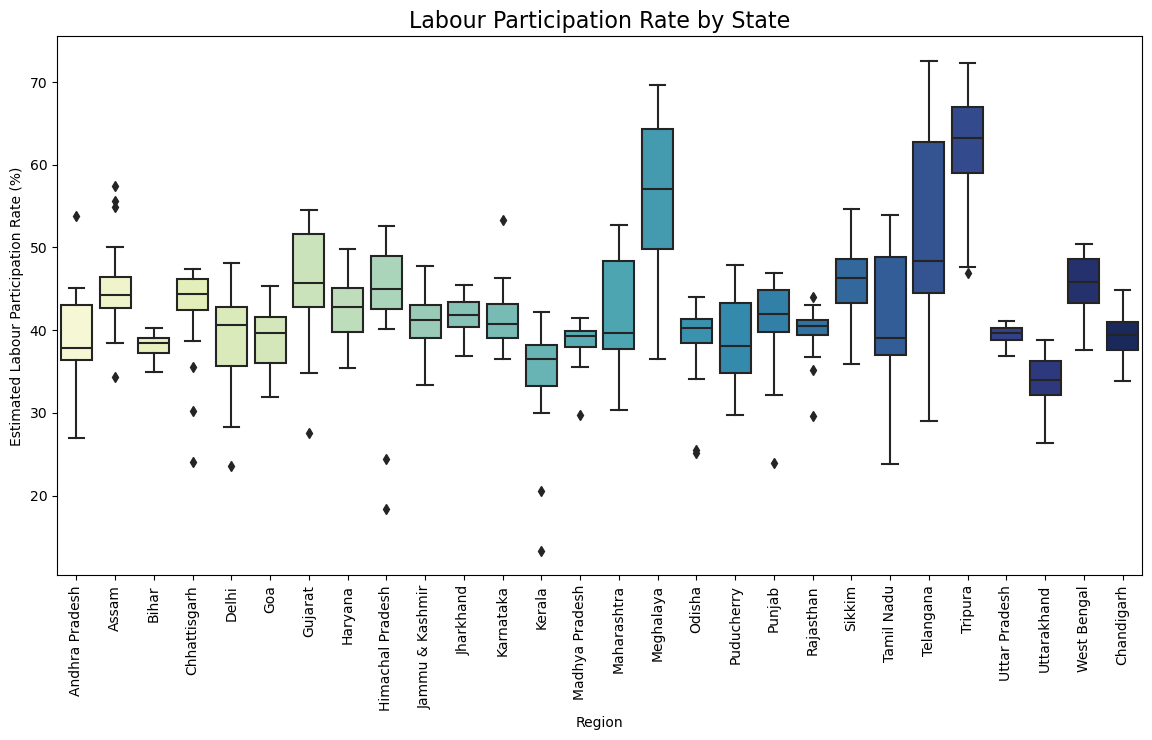

In [103]:
# Labour Participation Rate by State
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df , palette='YlGnBu')
plt.title('Labour Participation Rate by State', fontsize=16)
plt.xticks(rotation=90)
plt.show()


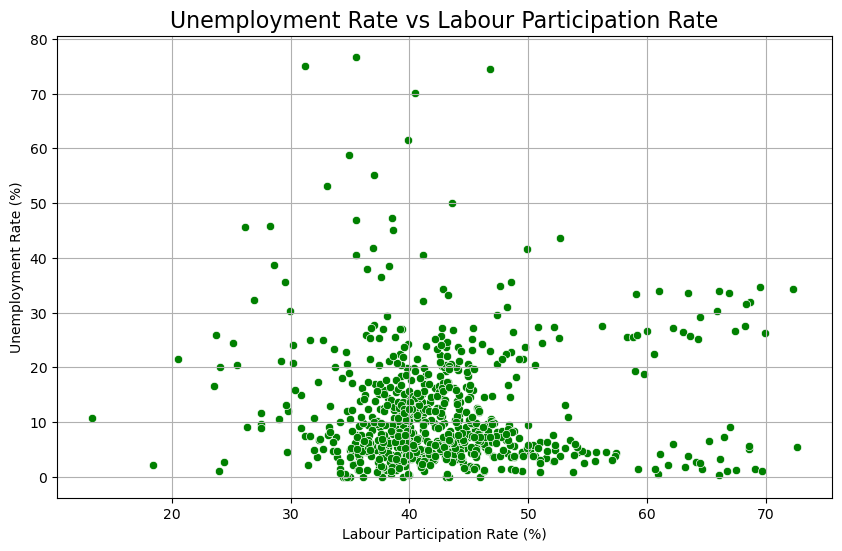

In [91]:
# Unemployment Rate vs Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df ,  color = 'GREEN')
plt.title('Unemployment Rate vs Labour Participation Rate', fontsize=16)
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


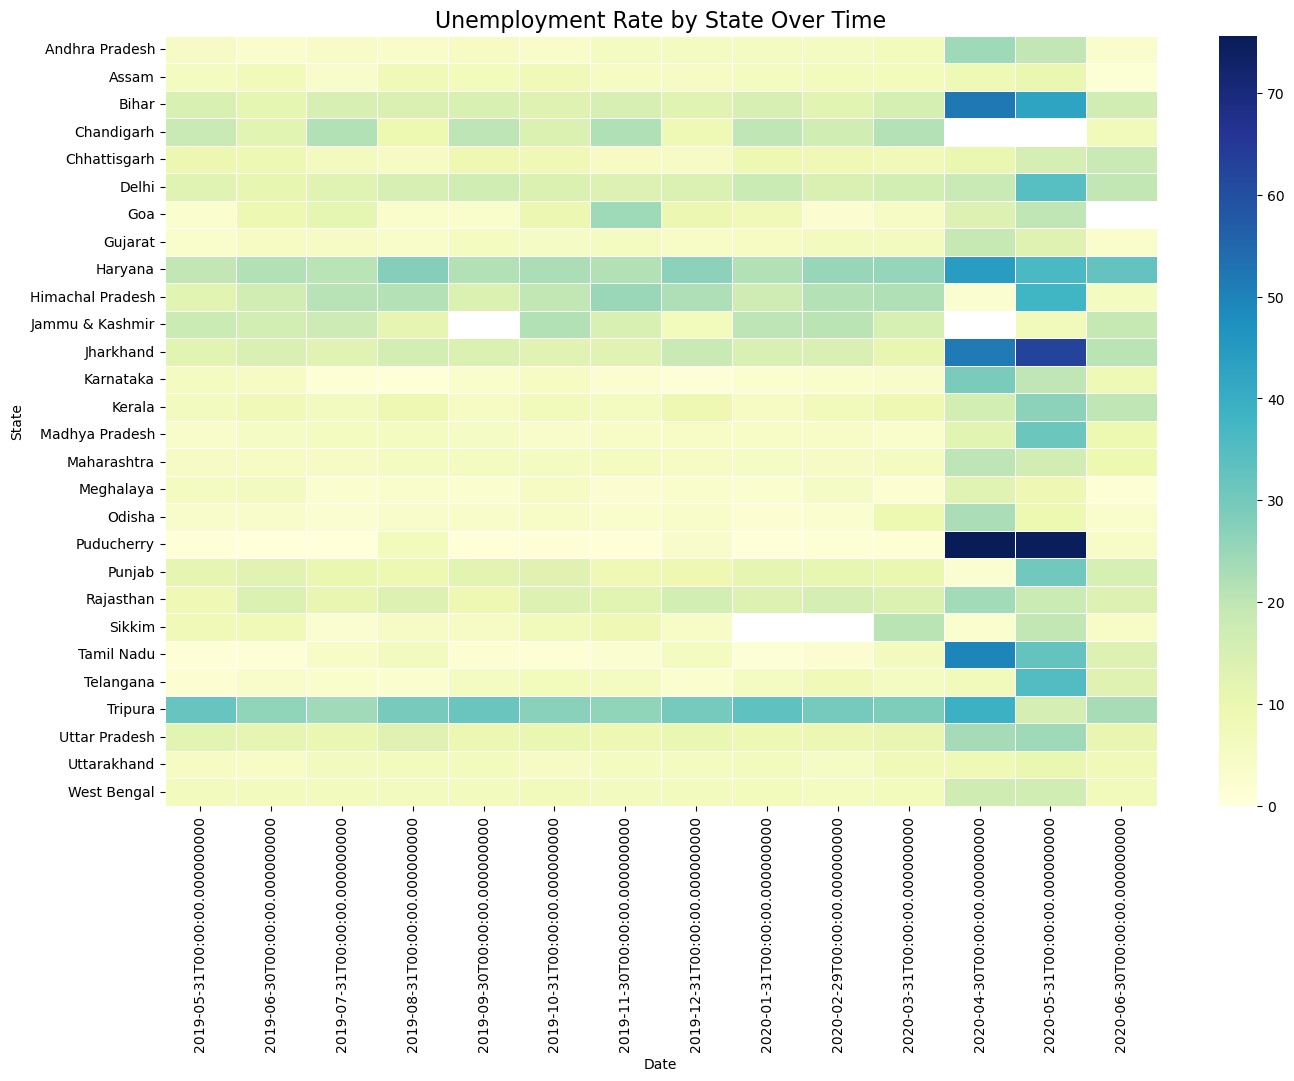

In [93]:
# Unemployment Rate by State Over Time
pivot_table = df.pivot_table(index='Region', columns='Date', values='Estimated Unemployment Rate (%)')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Unemployment Rate by State Over Time', fontsize=16)
plt.ylabel('State')
plt.xlabel('Date')
plt.show()
